In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

In [11]:
"""
This is an example Turing machine (3-state Busy Beaver) implemented using nested conditionals. This however
is not what was being asked for, and hence is only useful for evaluation purposes.


Part of this code was reused in order to create the classes Turing and TuringViewer
"""


def test_turing(array, index = 0):
    state = 0
    steps = 0 # THIS IS FOR EVALUATION PURPOSES

    """By default, the Busy Beaver starts at index 0 with state A"""
    index, state = state_a(array, index)
    
    while state != 3:
        steps += 1
        
        if state == 0:
            index, state = state_a(array, index)

        elif state == 1:
            index, state = state_b(array, index)
        
        elif state == 2:
            index, state = state_c(array, index)
            
    return steps

def state_a(array, index):
    
    if array[index] == 0:
        array[index] = 1
        
        if len(array) - 1 == index:
            array.append(0)
            
        return index + 1, 1
            
    elif array[index] == 1:
        array[index] = 1
        
        if index == 0:
            array.appendleft(0)

            return index, 2
        
        else:
            return index - 1, 2
    
def state_b(array, index):
    
    if array[index] == 0:
        array[index] = 1
        
        if index == 0:
            array.appendleft(0)

            return index, 0
        
        else:
            return index - 1, 0
            
    elif array[index] == 1:
        array[index] = 1
        
        if len(array) - 1 == index:
            array.append(0)
        
        return index + 1, 1
    
def state_c(array, index):
    
    if array[index] == 0:
        array[index] = 1
        
        if index == 0:
            array.appendleft(0)

            return index, 0
        
        else:
            return index - 1, 1
            
    elif array[index] == 1:
        array[index] = 1
        
        return index, 3

In [51]:
class Turing:
    """
    This creates the Turing machine without any required parameters
    
    Optional Parameter:
    
    Columns: Determines the width of the created array
    (Length of array is automatically determined by the code)
    
    Call the method .experiment() in order to perform the experiment
    .results() and .positions() gives the result of the experiment and the positions and the states of the head
    through out the experiment
    """
    
    def __init__ (self, columns = 11):
        
        self._columns = columns
        self._index = self._columns // 2
        self._row = 0
        self._state = 0
        
        self._results, self._position = np.zeros((1, self._columns)), np.zeros((1, self._columns))
        self._position[0, self._columns // 2] = 1
    
    """The three following functions define the states A to C"""
    def state_a_mat(self, array, row, index):
    
        if self._results[self._row, self._index] == 0:
            self._results[self._row, self._index] = 1
        
            return index + 1, row + 1, 1
    
        elif self._results[self._row, self._index] == 1:
            self._results[self._row, self._index] = 1
        
            return index - 1, row + 1, 3
    
    def state_b_mat(self, array, row, index):
    
        if self._results[self._row, self._index] == 0:
            self._results[self._row, self._index] = 0
        
            return index + 1, row + 1, 2
    
        elif self._results[self._row, self._index] == 1:
            self._results[self._row, self._index] = 1
        
            return index + 1, row + 1, 1
    
    def state_c_mat(self, array, row, index):
    
        if self._results[self._row, self._index] == 0:
            self._results[self._row, self._index] = 1
        
            return index - 1, row + 1, 2
    
        elif self._results[self._row, self._index] == 1:
            self._results[self._row, self._index] = 1
        
            return index + 1, row + 1, 0
        
    def experiment(self):
        """
        This uses conditionals to move between the three states
        
        The action table from https://en.wikipedia.org/wiki/Busy_beaver#Examples was used for the 3-state 2-color system
        """
        
        self._index, self._row, self._state = self.state_a_mat(self._results, 0, self._index)
        
        while self._state != 3:
            """This is the part of the code that adds a new row to the arrays"""
            self._results = np.vstack([self._results, self._results[self._row-1]])
            self._position = np.vstack([self._position, np.zeros(self._columns)])
        
            if self._state == 0:
                self._position[self._row, self._index] = 1    # Sets the state of the head; 1 = A, 2 = B, 3 = C
                self._index, self._row, self._state = self.state_a_mat(self._results, self._row, self._index)

            elif self._state == 1:
                self._position[self._row, self._index] = 2
                self._index, self._row, self._state = self.state_b_mat(self._results, self._row, self._index)
                
            elif self._state == 2:
                self._position[self._row, self._index] = 3
                self._index, self._row, self._state = self.state_c_mat(self._results, self._row, self._index)

    """
    These two functions return the arrays results and position
    
    Note that the same result may be obtained by adding return self._results, self._position in experiments()
    This however allows only one array to be grabbed from the experiment
    """
    def results(self):
        
        return self._results
    
    def positions(self):
        
        return self._position 

In [18]:
test_1 = Turing()
test_1.experiment()                                     # This performs the experiment

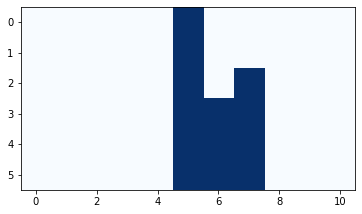

In [17]:
plt.imshow(test_1.results(), 'Blues')
plt.show()

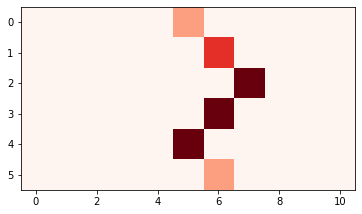

In [52]:
plt.imshow(test_1.positions(), 'Reds')
plt.show()

In [53]:
class TuringViewer:
    """
    This defines the class TuringViewer which generates the needed plots for the Turing machine
    
    Note that this is very redundant since a simple function would have sufficed, or as defined previously, the
    class Turing already has everything needed in order to generate the required plots
    """
    def __init__(self, columns = 11):
        
        self._columns = columns
        
        self._experiment = Turing(columns)
        self._experiment.experiment()
        
        self._positions, self._results = self._experiment.positions(), self._experiment.results()
        
        
    """This creates the combined plots of positions and results"""
    def imposed_plot(self):
        
        plt.imshow(self._positions, 'Reds')
        plt.imshow(self._results, 'Blues', alpha=0.5)
        plt.show()
        
    def position_plot(self):
    
        plt.imshow(self._positions, 'Reds')
        plt.show()
        
    def value_plot(self):
        
        plt.imshow(self._results, 'Reds')
        plt.show()

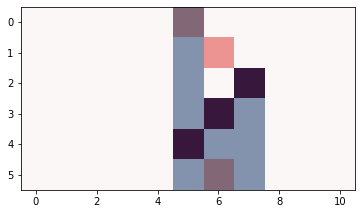

In [54]:
a = TuringViewer()

a.imposed_plot()

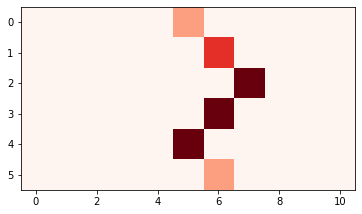

In [55]:
a.position_plot()

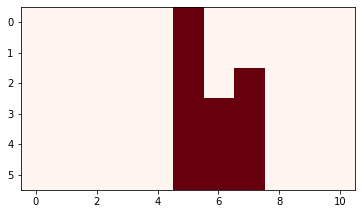

In [56]:
a.value_plot()